In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

## xx201

In [18]:
df=pd.read_csv('./bootstrap_error/6050390201/best_fit_period_0.01bin_1000.txt',sep='\t',header=None)
# df1=pd.read_csv('./bootstrap_error/6050390201/best_fit_period_100.1.txt',sep='\t')
df.head()

,0,1
0,./bootstrap_error/6050390201/synthetic_light_c...,9.8040
1,./bootstrap_error/6050390201/synthetic_light_c...,9.8040
2,./bootstrap_error/6050390201/synthetic_light_c...,9.8040
3,./bootstrap_error/6050390201/synthetic_light_c...,9.8045
4,./bootstrap_error/6050390201/synthetic_light_c...,9.8092


In [4]:
print(df[1].mean(), df[1].std())
# print(df1['Best_Fit_Period'].mean(), df1['Best_Fit_Period'].std())
# print(dfexpt[1].mean(), dfexpt[1].std())

9.803782647058823 0.013675237208597795


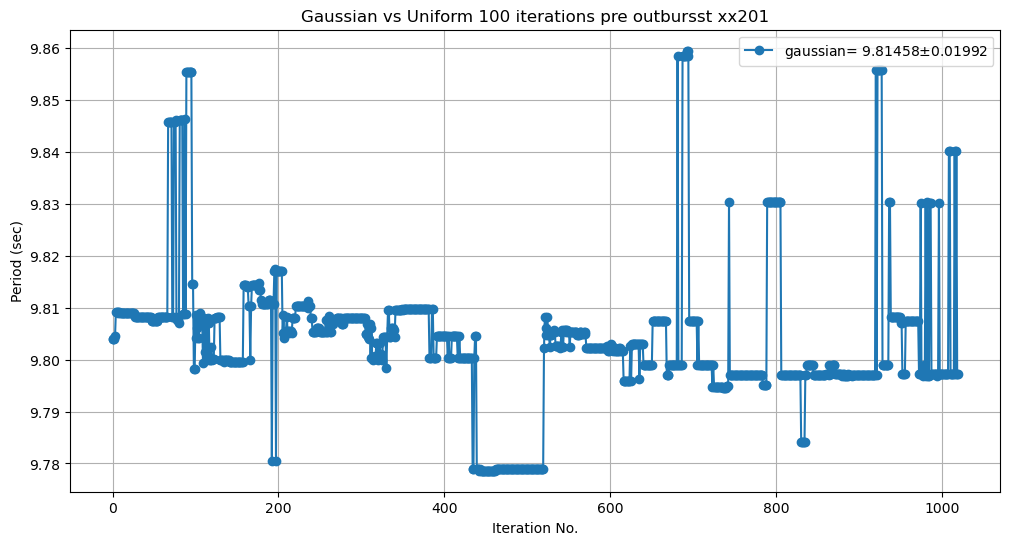

In [6]:
plt.figure(figsize=(12,6))
plt.plot(df[1],'-o',label=r'gaussian= {}$\pm$0.01992')
#plt.plot(df1['Best_Fit_Period'],'-o',label=r'uniform= 9.80596$\pm$0.00913')
plt.grid()
plt.title('Gaussian vs Uniform 100 iterations pre outbursst xx201')
plt.ylabel('Period (sec)')
plt.xlabel('Iteration No.')
plt.legend()

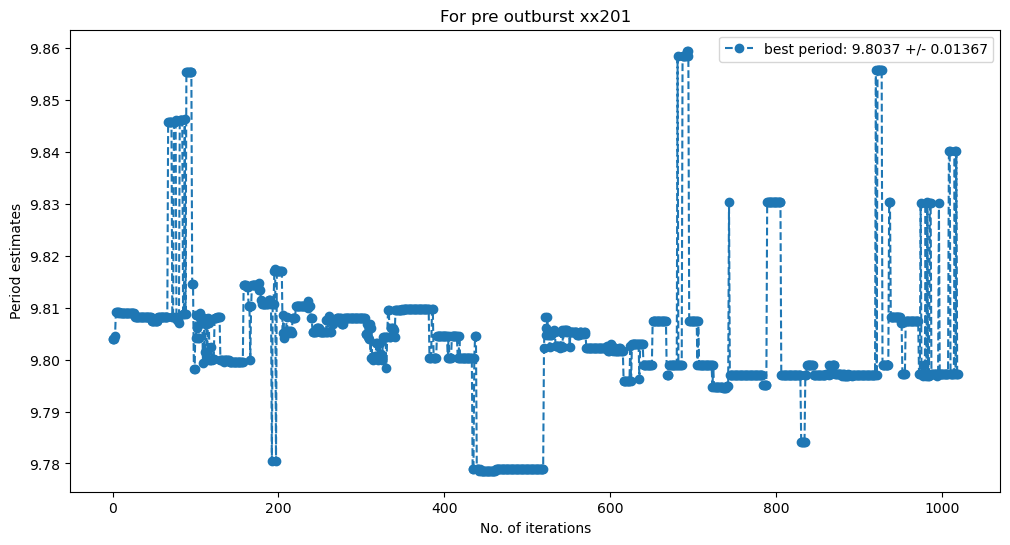

In [13]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(len(df[1])),df[1],'--o',label=f'best period: 9.8037 +/- 0.01367')
#print('best period:',df[1].mean(),'+/-',df[1].std())
plt.title('For pre outburst xx201')
plt.xlabel('No. of iterations')
plt.ylabel('Period estimates')
plt.legend()

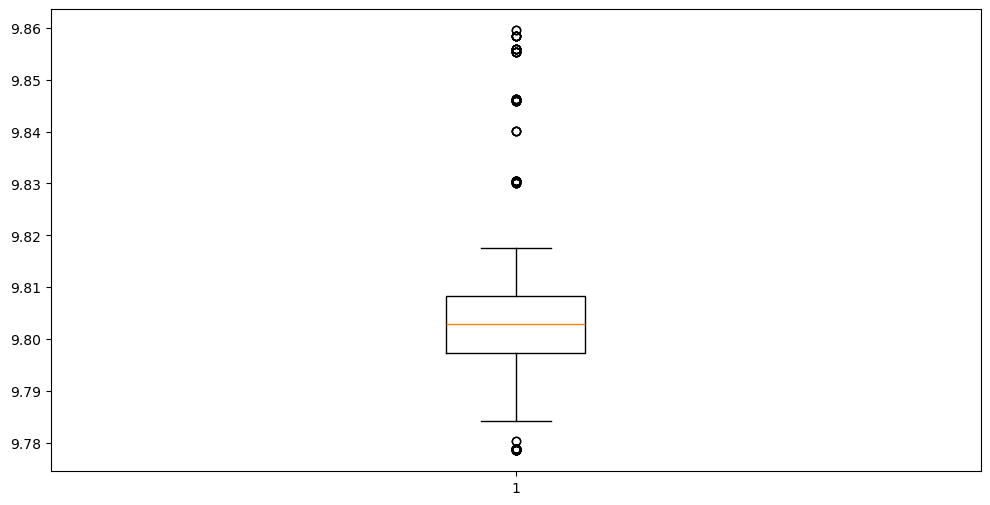

In [8]:
plt.figure(figsize=(12,6))
plt.boxplot(df[1])
plt.show()

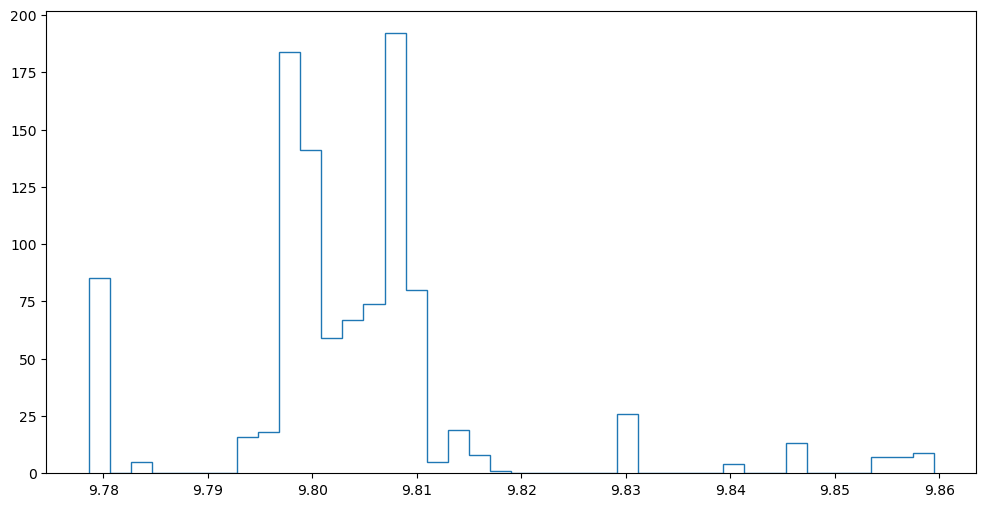

Text(0.5, 1.0, 'histogram of best fit periods for 1000 iterations of xx201')

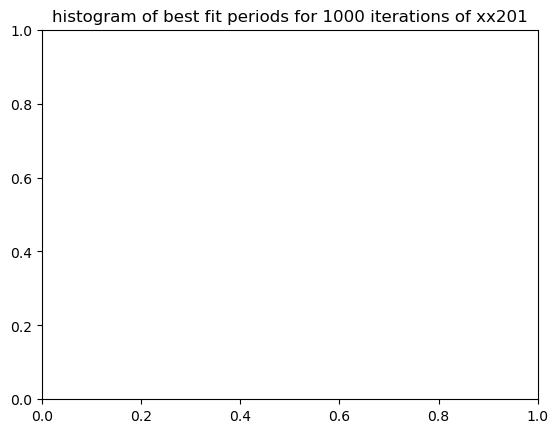

In [20]:
plt.figure(figsize=(12,6))
freq =plt.hist(df[1],histtype='step',bins=40)
plt.show()
freq[0],freq[1]
plt.title('histogram of best fit periods for 1000 iterations of xx201')
#plt.hist(df1['Best_Fit_Period'],histtype='step')

9.8069 716.92285


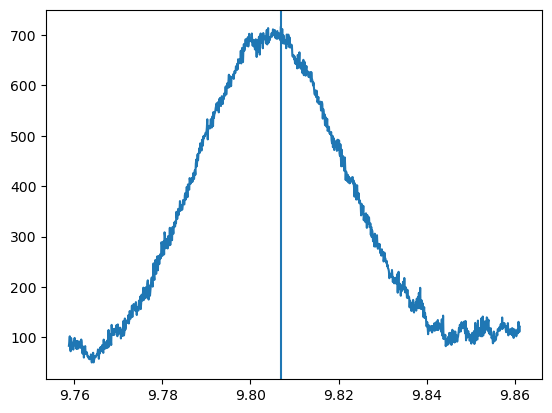

In [10]:
### Checking chisq vs period files

with fits.open('testing_efsearch0.fes') as hdul:
    per=hdul['RESULTS'].data['PERIOD']
    chisq=hdul['RESULTS'].data['CHISQRD1']

plt.plot(per,chisq)
plt.axvline(per[np.argmax(chisq)])
print(per[np.argmax(chisq)],chisq[np.argmax(chisq)])

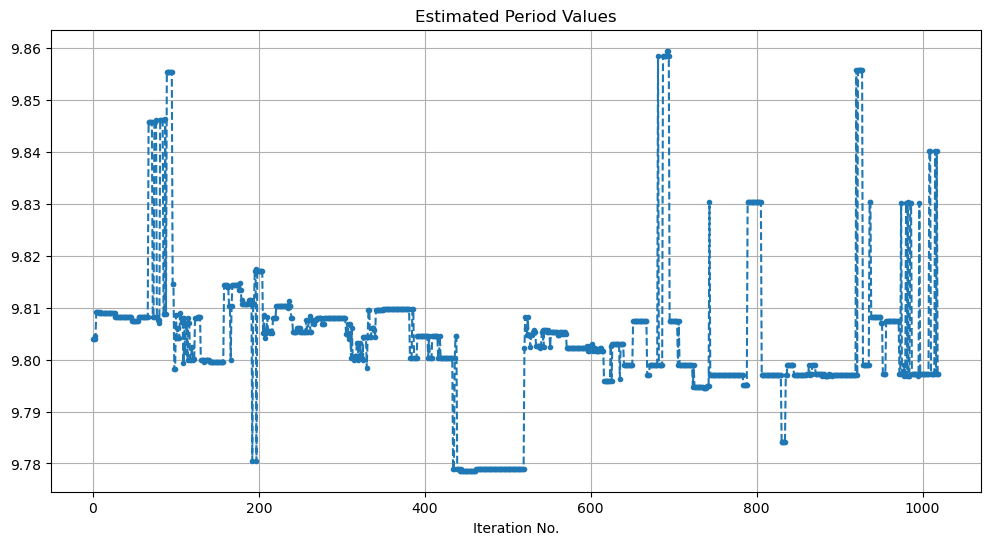

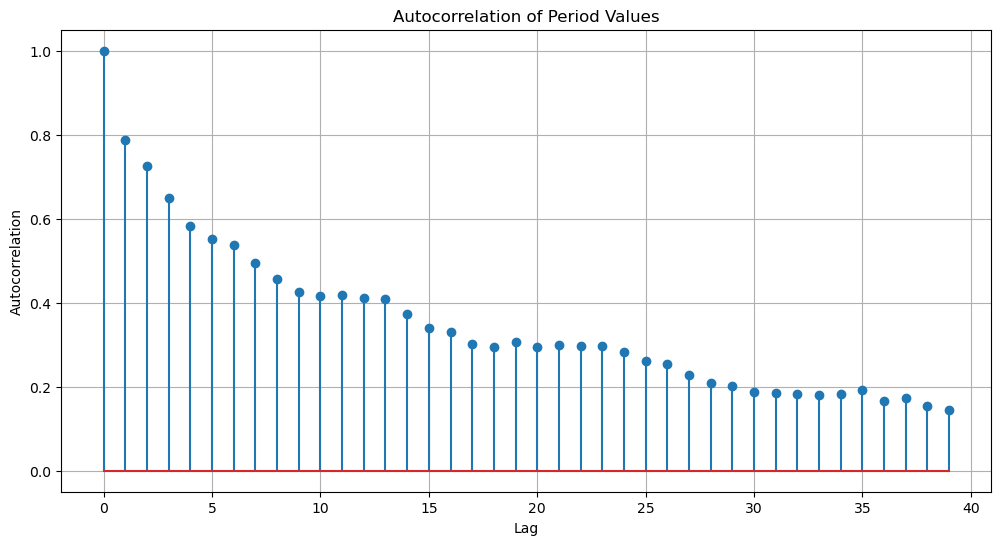

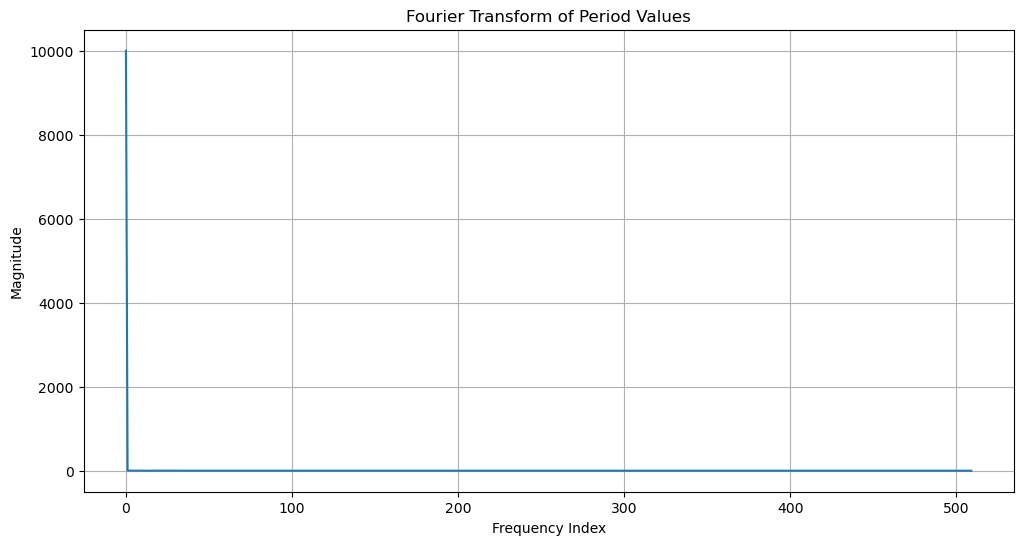

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

# Load the period data from the text file
df = pd.read_csv('./bootstrap_error/6050390201/best_fit_period_0.01bin_1000.txt', sep='\t', header=None)

# Assuming the periods are in the first column
periods = df[1].values

# 1. Visualize the period values
plt.figure(figsize=(12, 6))
plt.plot(periods, marker='o', linestyle='--', markersize=3)
plt.title('Estimated Period Values')
plt.xlabel('Iteration No.')
plt.grid()
plt.show()

# 2. Autocorrelation (manual calculation)
def autocorrelation(x):
    n = len(x)
    variance = x.var()
    mean = x.mean()
    c0 = np.sum((x - mean) ** 2) / n
    acf_values = np.correlate(x - mean, x - mean, mode='full')[n-1:] / (n * c0)
    return acf_values

lag_acf = autocorrelation(periods)

# Plotting autocorrelation
plt.figure(figsize=(12, 6))
plt.stem(lag_acf[:40])  # Plot the first 40 lags
plt.title('Autocorrelation of Period Values')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid()
plt.show()

# 3. Fourier Transform
frequencies = fft(periods)
magnitude = np.abs(frequencies)

# Only plot the first half of the frequencies (real-valued)
plt.figure(figsize=(12, 6))
plt.plot(magnitude[:len(magnitude)//2])  # Plot the magnitude for half the frequencies
plt.title('Fourier Transform of Period Values')
plt.xlabel('Frequency Index')
plt.ylabel('Magnitude')
plt.grid()
plt.show()


## xx204

In [110]:
df=pd.read_csv('./bootstrap_error/6050390204/best_fit_period_0.1bin_100.txt',sep='\t',header=None)
# df1=pd.read_csv('./bootstrap_error/6050390201/best_fit_period_100.1.txt',sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       43 non-null     object 
 1   1       43 non-null     float64
 2   2       43 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.1+ KB


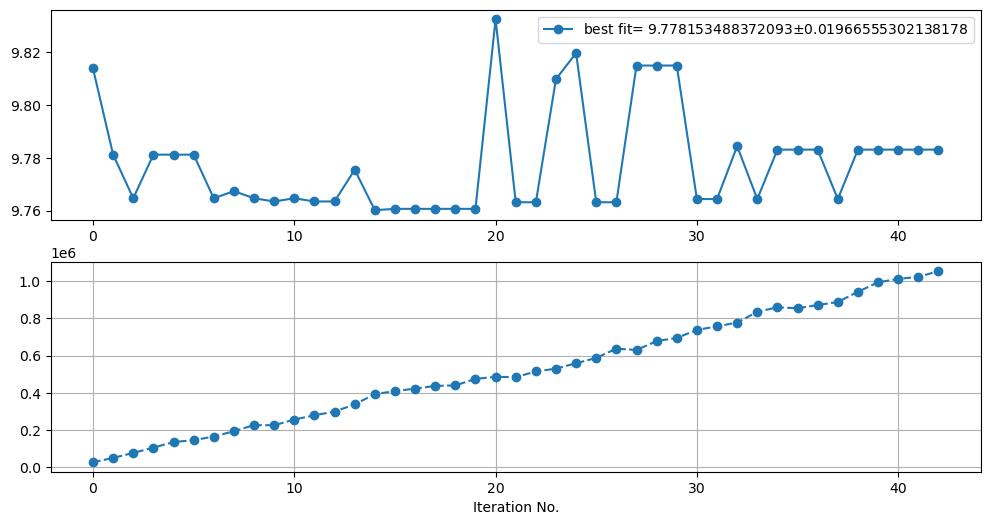

In [111]:
fig,axs=plt.subplots(2,1,figsize=(12,6))
axs[0].plot(df[1],'-o',label=f'best fit= {df[1].mean()}$\pm${df[1].std()}')
axs[1].plot(df[2],'--o')
#plt.plot(df3['Best_Fit_Period'],'-o',label=r'uniform= 9.80575$\pm$0.00780')
plt.xlabel('Iteration No.')
axs[0].legend()
plt.grid()

(array([22.,  0.,  5.,  9.,  0.,  0.,  1.,  4.,  1.,  1.]),
 array([9.7602 , 9.76742, 9.77464, 9.78186, 9.78908, 9.7963 , 9.80352,
        9.81074, 9.81796, 9.82518, 9.8324 ]),
 <BarContainer object of 10 artists>)

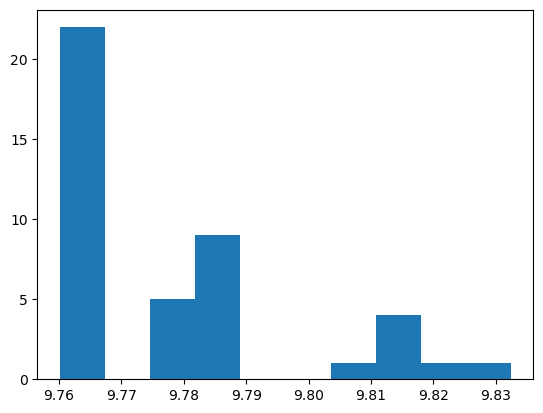

In [112]:
plt.hist(df[1])

## Mid Burst

In [15]:
df2=pd.read_csv('./bootstrap_error/6050390244/best_fit_period_0.1bin_500.txt',sep='\t',header=None)
df2

,0,1,2
0,./bootstrap_error/6050390244/synthetic_light_c...,9.801,24675.246094
1,./bootstrap_error/6050390244/synthetic_light_c...,9.801,24527.343750
2,./bootstrap_error/6050390244/synthetic_light_c...,9.801,25201.718750
3,./bootstrap_error/6050390244/synthetic_light_c...,9.801,25403.710938
4,./bootstrap_error/6050390244/synthetic_light_c...,9.801,25683.326172
...,...,...,...
95,./bootstrap_error/6050390244/synthetic_light_c...,9.767,33619.542969
96,./bootstrap_error/6050390244/synthetic_light_c...,9.767,33310.808594
97,./bootstrap_error/6050390244/synthetic_light_c...,9.767,33399.792969
98,./bootstrap_error/6050390244/synthetic_light_c...,9.767,33103.621094


In [16]:
print(df2[1].mean(), df2[1].std())

9.795080000000002 0.0172507824445589


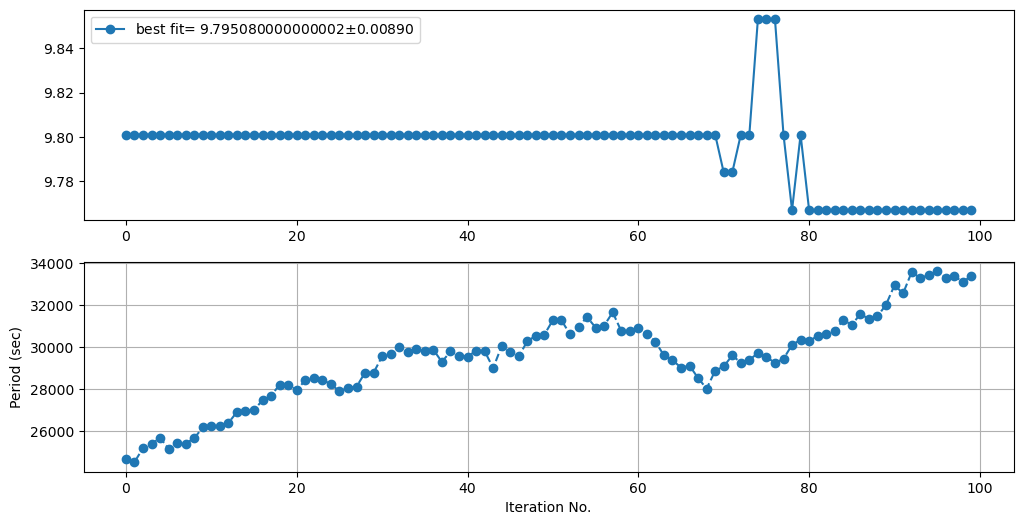

In [17]:

fig,axs=plt.subplots(2,1,figsize=(12,6))
axs[0].plot(df2[1],'-o',label=f'best fit= {df2[1].mean()}$\pm$0.00890')
axs[1].plot(df2[2],'--o')
#plt.plot(df3['Best_Fit_Period'],'-o',label=r'uniform= 9.80575$\pm$0.00780')

plt.ylabel('Period (sec)')
plt.xlabel('Iteration No.')
axs[0].legend()
plt.grid()

9.79754

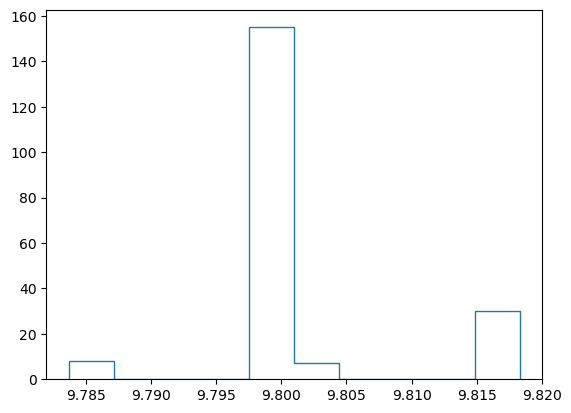

In [68]:
freq=plt.hist(df2[1],histtype='step',bins=10)
freq[1][np.argmax(freq[0])]

9.818200000000001 25256.31


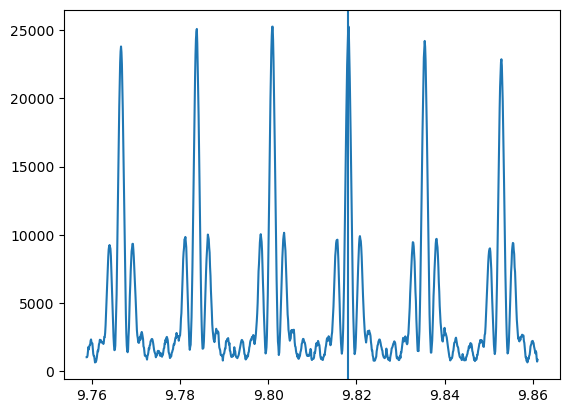

In [27]:
### Checking chisq vs period files

with fits.open('./bootstrap_error/6050390244/testing_efsearch29.fes') as hdul:
    per=hdul['RESULTS'].data['PERIOD']
    chisq=hdul['RESULTS'].data['CHISQRD1']

plt.plot(per,chisq)
plt.axvline(per[np.argmax(chisq)])
print(per[np.argmax(chisq)],chisq[np.argmax(chisq)])

## xx261

In [10]:
df4=pd.read_csv('./bootstrap_error/6050390261/best_fit_period_261_100.1.txt',sep='\t',header=None)

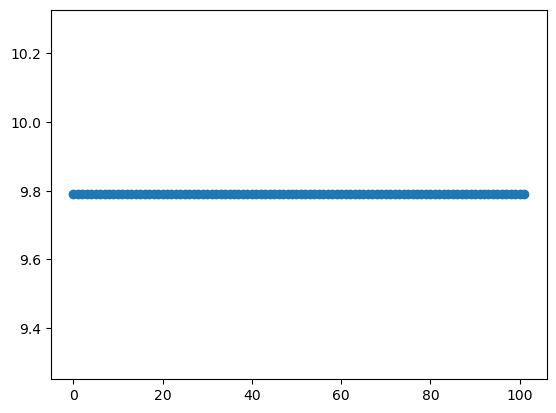

In [11]:
plt.plot(df4[1],'-o')

In [25]:
# def are_light_curves_different(rate1, rate2, tolerance=1e-6):
#     # Compute element-wise absolute difference
#     diff = np.abs(rate1 - rate2)
    
#     # Check if all differences are smaller than the tolerance
#     if np.all(diff < tolerance):
#         return False  # They are the same within the tolerance
#     else:
#         return True   # They are different
    
# with fits.open('./6050390201/xti/event_cl/ni6050390201_cl_night_barycorrmpu7_sr_night_0.5.lc') as hdul:
#         rate_data = hdul['RATE'].data
#         time1 = rate_data['TIME']
#         rate1 = rate_data['RATE']
#         error1 = rate_data['ERROR']

# with fits.open('./6050390201/xti/event_cl/ni6050390201_cl_night_barycorrmpu7_sr_night_1.lc') as hdul:
#         rate_data = hdul['RATE'].data
#         time2 = rate_data['TIME']
#         rate2 = rate_data['RATE']
#         error2 = rate_data['ERROR']

# with fits.open('./6050390201/xti/event_cl/ni6050390201_cl_night_barycorrmpu7_sr_night_0.1.lc') as hdul:
#         rate_data = hdul['RATE'].data
#         time3 = rate_data['TIME']
#         rate3 = rate_data['RATE']
#         error3 = rate_data['ERROR']

with fits.open('./6050390244/xti/event_cl/ni6050390244_cl_night_barycorrmpu7_sr_night_0.01.lc') as hdul:
        rate_data = hdul['RATE'].data
        time4 = rate_data['TIME']
        rate4 = rate_data['RATE']
        error4 = rate_data['ERROR']
# if are_light_curves_different(rate1, raate2):
#     print("The two light curves are different.")
# else:
#     print("The two light curves are identical or nearly identical.")

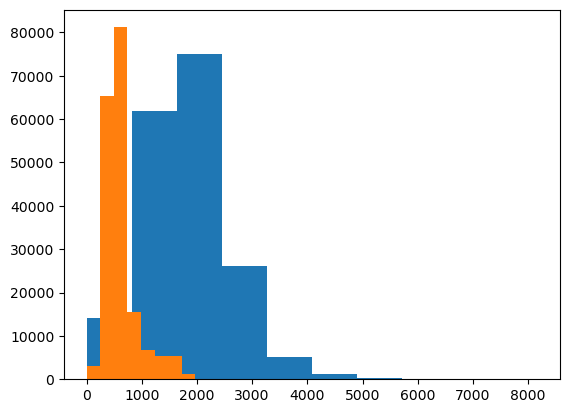

<ErrorbarContainer object of 3 artists>

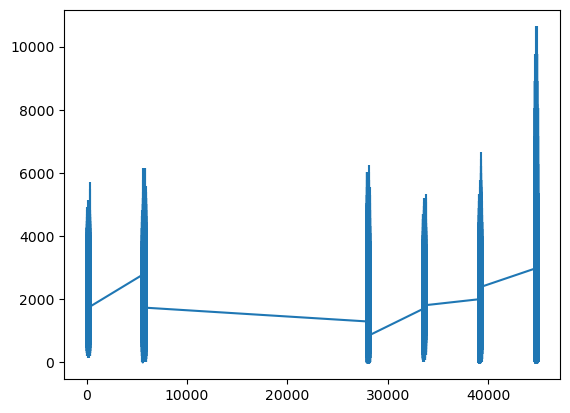

In [30]:
plt.hist(rate4)
plt.hist(error4)
plt.show()
plt.errorbar(time4,rate4,error4)

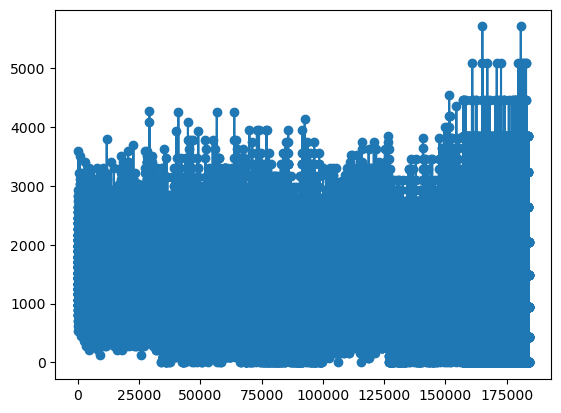

In [44]:
plt.plot(rate4-error4,'-o')

In [105]:
synthetic_rate = np.zeros_like(rate4)
for j in range(len(rate4)):
    gamma_j = np.random.normal(loc=0, scale=error4[j])  # Centered at 0, scaled by the bin's error
    synthetic_rate[j] = rate4[j] + gamma_j 

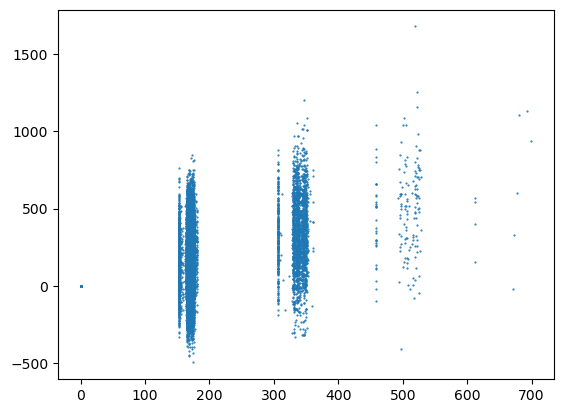

In [108]:
plt.scatter(rate4,synthetic_rate,0.3)

NameError: name 'time1' is not defined

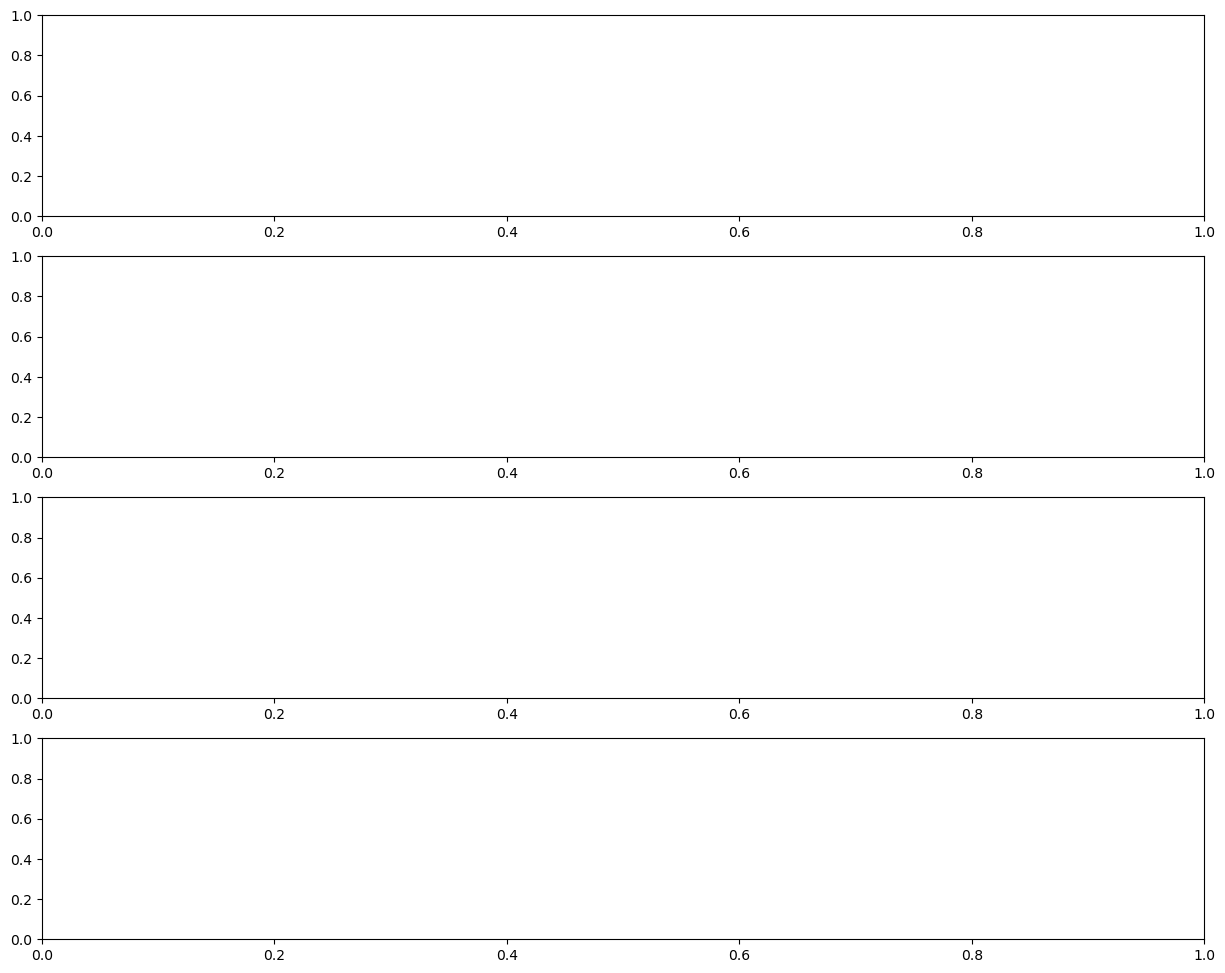

In [99]:
# fig,axs=plt.subplots(4,1,figsize=(15,12))
# axs[0].scatter(time1, rate1,0.5)
# axs[0].set_title('bin=0.5 sec')
# axs[1].scatter(time2,rate2,0.5)
# axs[1].set_title('bin=1 sec')
# axs[2].scatter(time3,rate3,0.5)
# axs[2].set_title('bin=0.1 sec')
# axs[3].scatter(time4,rate4,0.5)
# axs[3].set_title('bin=0.0025 sec')
# plt.tight_layout()

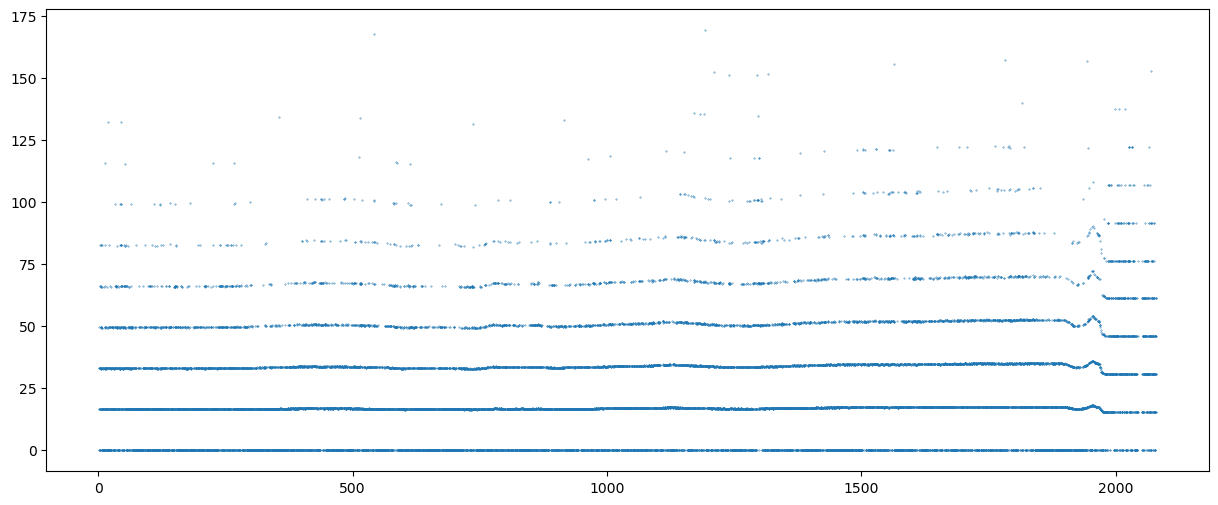

In [87]:
plt.figure(figsize=(15,6))
plt.scatter(time3, rate3,0.1)
